In [5]:
import numpy as np
import matplotlib.pyplot as plt


## Multivariate normal distribution

The multivariate normal distribution is a **multidimensional generalisation** of the one-dimensional normal distribution. It represents the distribution of a multivariate random variable that is made up of **multiple random variables** that can be correlated with eachother.

Like the normal distribution, the multivariate normal is defined by sets of parameters: the **mean vector** $\mu$, which is the expected value of the distribution; and the **covariance matrix** $\Sigma$, which measures how dependend two random variables are and how they change together.

The multivariate normal with dimensionality $d$ has a joint probability density given by:

\begin{equation}
p(\mathbf{x} \mid \mathbf{\mu}, \Sigma) = \frac{1}{\sqrt{(2\pi)^d \lvert\Sigma\rvert}} \exp{ \left( -\frac{1}{2}(\mathbf{x} - \mathbf{\mu})^T \Sigma^{-1} (\mathbf{x} - \mathbf{\mu}) \right)}
\end{equation}

Where $\mathbf{x}$ is a random vector of size $d$, $\mathbf{\mu}$ is the mean vector, $\mathbf{\Sigma}$ is the (symmetric , positive definite) covariance matrix (of size $d \times d$, and $|\Sigma|$ its determinant. We denote this multivariate normal distribution as:

\begin{equation}
\mathcal{N}(\mathbf{\mu}, \Sigma)
\end{equation}

In [6]:
def multivariate_normal(X, Y, d, mean, covariance):
    # Pack X and Y into a single 3-dimensional array
    pos = np.dstack([X,Y])
    
    n = mu.shape[0]
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    N = np.sqrt((2*np.pi)**n * Sigma_det)
    # This einsum call calculates (x-mu)T.Sigma-1.(x-mu) in a vectorized
    # way across all the input variables.
    fac = np.einsum('...k,kl,...l->...', pos-mu, Sigma_inv, pos-mu)

    return np.exp(-fac / 2) / N

Examples of two bivariate normal distributions are plotted below.

The figure on the left is a bivariate distribution with the covariance between $x_1$ and $x_2$ set to $0$  so that these 2 variables are independent:

\begin{equation}
\mathcal{N}\left(
\begin{bmatrix}
0 \\
0
\end{bmatrix}, 
\begin{bmatrix}
1 & 0 \\
0 & 1 
\end{bmatrix}\right)
\end{equation}

In [7]:
N = 60
X = np.linspace(-3, 3, N)
Y = np.linspace(-3, 4, N)
X, Y = np.meshgrid(X, Y)

# Mean vector and covariance matrix
mu = np.array([0., 0])
Sigma = np.array([[ 1. , 0], [0,  1]])

# The distribution on the variables X, Y packed into pos.
Z = multivariate_normal(X, Y, 2, mu, Sigma)

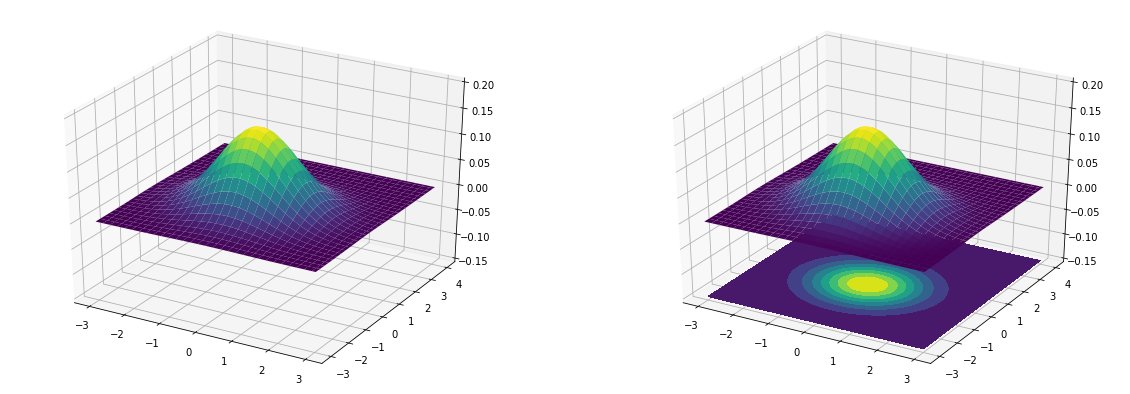

In [9]:
# Create a surface plot and projected filled contour plot under it.
fig = plt.figure(figsize=(20,7))

# Figure 1
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

# Adjust the limits, ticks and view angle
ax.set_zlim(-0.15,0.2)

# Figure 2
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
cset = ax.contourf(X, Y, Z, zdir='z', offset=-0.15, cmap='viridis')

# Adjust the limits, ticks and view angle
ax.set_zlim(-0.15,0.2)

plt.show()

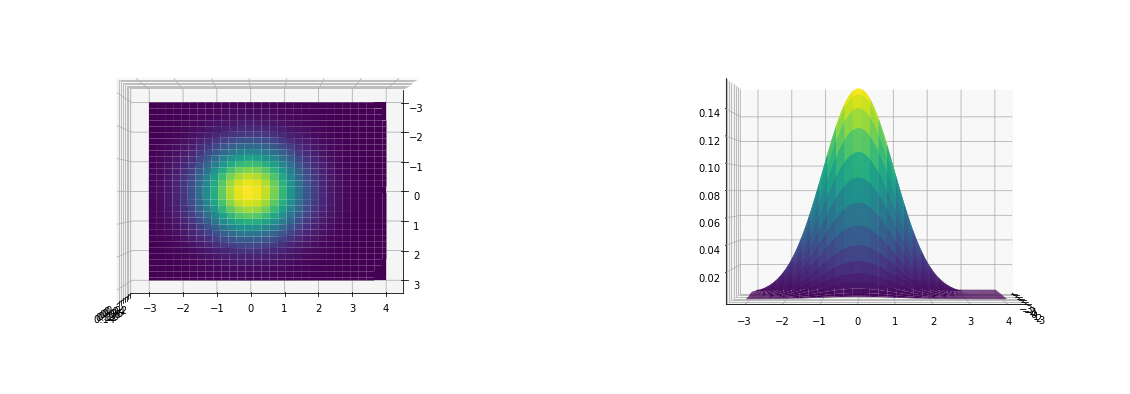

In [10]:
# Create a surface plot and projected filled contour plot under it.
fig = plt.figure(figsize=(20,7))

# Figure 1
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

# Adjust the limits, ticks and view angle
ax.view_init(90, 0)

# Figure 2
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

# Adjust the limits, ticks and view angle
ax.view_init(0, 0)

plt.show()

The figure on the right is a bivariate distribution with the covariance between $x_1$ and $x_2$ set to be different than $0$ so that both variables are correlated. Increasing $x_1$ will increase the probability that $x_2$ will also increase:

\begin{equation}
\mathcal{N}\left(
\begin{bmatrix}
0 \\
1
\end{bmatrix}, 
\begin{bmatrix}
1 & 0.8 \\
0.8 & 1
\end{bmatrix}\right)
\end{equation}

In [11]:
N = 60
X = np.linspace(-4, 4, N)
Y = np.linspace(-4, 4, N)
X, Y = np.meshgrid(X, Y)

# Mean vector and covariance matrix
mu = np.array([0., 1.])
Sigma = np.array([[ 1. , 0.8], [0.8,  1]])

# The distribution on the variables X, Y packed into pos.
Z = multivariate_normal(X, Y, 2, mu, Sigma)

Sigma

array([[1. , 0.8],
       [0.8, 1. ]])

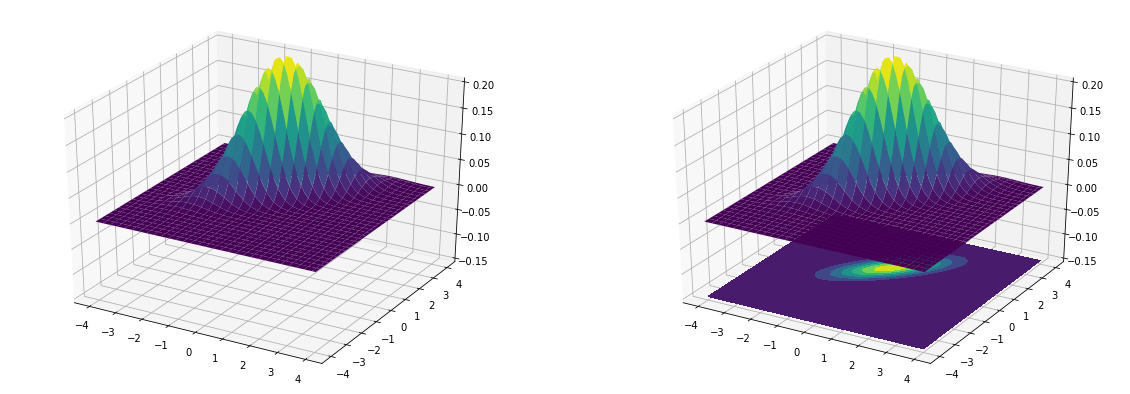

In [12]:
# Create a surface plot and projected filled contour plot under it.
fig = plt.figure(figsize=(20,7))

# Figure 1
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

# Adjust the limits, ticks and view angle
ax.set_zlim(-0.15,0.2)

# Figure 2
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
cset = ax.contourf(X, Y, Z, zdir='z', offset=-0.15, cmap='viridis')

# Adjust the limits, ticks and view angle
ax.set_zlim(-0.15,0.2)

plt.show()

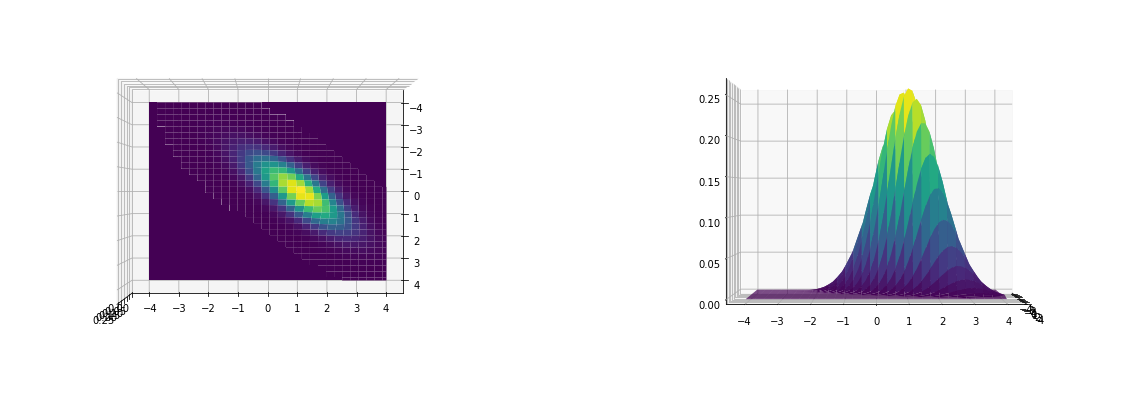

In [13]:
# Create a surface plot and projected filled contour plot under it.
fig = plt.figure(figsize=(20,7))

# Figure 1
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

# Adjust the limits, ticks and view angle
ax.view_init(90, 0)

# Figure 2
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

# Adjust the limits, ticks and view angle
ax.view_init(0, 0)

plt.show()

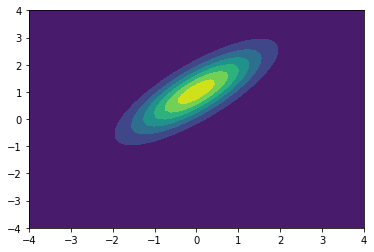

In [14]:
from scipy.stats import multivriate_noarmal

pos2 = np.dstack([X,Y])

rv = multivariate_normal(mu, Sigma)
Z = rv.pdf(pos2)
plt.contourf(X, Y, Z, cmap='viridis')